In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import torch
from torch_geometric.data import Data
import osmnx as ox

In [2]:
graph_50 = ox.load_graphml('aalborg_nodes_undirected_filtered_50.graphml')

In [3]:
nodes, edges = ox.graph_to_gdfs(graph_50)

In [ ]:
lookback = 20  # Define your lookback period
all_features = {}  # Dictionary to store node features for each time step
all_targets = {}   # Dictionary to store target values for each time step

# Assuming each node has a pandas Series of traffic data as node attribute
for node, data in graph_50.nodes(data=True):
    if 'time_series_data' in data:  # Check if node has traffic data
        series = data['time_series_data']  # Access the pandas Series with traffic data
        features, targets = [], []
        # Sliding window for lookback
        for i in range(lookback, len(series)):
            feature_window = series[i-lookback:i].values
            target = series[i]  # Single step prediction
            features.append(feature_window)
            targets.append(target)
        
        all_features[node] = torch.tensor(features, dtype=torch.float)
        all_targets[node] = torch.tensor(targets, dtype=torch.float)


[


AttributeError: 'str' object has no attribute 'values'

In [14]:
G_proj = graph_50
# Verification in G_proj
missing_data_edges = 0
total_edges = len(G_proj.nodes(data=True))

print("\nVerification of assigned data in `G_proj`:")
for u, edge_data in G_proj.nodes(data=True):
    if 'time_series_data' in edge_data:
        print(f"Nodes ({u}, {v}, {key}) has time series data.")
    else:
        missing_data_edges += 1

print(f"\nTotal edges in G_proj: {total_edges}")
print(f"Edges with missing time series data: {missing_data_edges}")
print(f"Edges with time series data: {total_edges - missing_data_edges}")



Verification of assigned data in `G_proj`:
Nodes (1037565973, 3020947453, 0) has time series data.
Nodes (1037566002, 3020947453, 0) has time series data.
Nodes (2752315483, 3020947453, 0) has time series data.
Nodes (1037566149, 3020947453, 0) has time series data.
Nodes (6479283213, 3020947453, 0) has time series data.
Nodes (6479283214, 3020947453, 0) has time series data.
Nodes (29972610, 3020947453, 0) has time series data.
Nodes (4688577983, 3020947453, 0) has time series data.
Nodes (29972677, 3020947453, 0) has time series data.
Nodes (6379866637, 3020947453, 0) has time series data.
Nodes (1601440333, 3020947453, 0) has time series data.
Nodes (1601440389, 3020947453, 0) has time series data.
Nodes (1601440391, 3020947453, 0) has time series data.
Nodes (1601440437, 3020947453, 0) has time series data.
Nodes (1601440438, 3020947453, 0) has time series data.
Nodes (1601440442, 3020947453, 0) has time series data.
Nodes (2588150496, 3020947453, 0) has time series data.
Nodes (2

In [39]:
pd.Series(graph_50.nodes[29972610]['time_series_data'])

0    [(Timestamp('2023-01-01 00:00:00'), 0.0), (Tim...
dtype: object

In [32]:
# acces node (29972610, 3020947453, 0)
for k in graph_50.nodes[29972610]['time_series_data']:
    print(k, end="")

[(Timestamp('2023-01-01 00:00:00'), 0.0), (Timestamp('2023-01-01 00:15:00'), 1.0), (Timestamp('2023-01-01 00:30:00'), 2.0), (Timestamp('2023-01-01 00:45:00'), 11.0), (Timestamp('2023-01-01 01:00:00'), 15.0), (Timestamp('2023-01-01 01:15:00'), 9.0), (Timestamp('2023-01-01 01:30:00'), 7.0), (Timestamp('2023-01-01 01:45:00'), 13.0), (Timestamp('2023-01-01 02:00:00'), 11.0), (Timestamp('2023-01-01 02:15:00'), 13.0), (Timestamp('2023-01-01 02:30:00'), 4.0), (Timestamp('2023-01-01 02:45:00'), 8.0), (Timestamp('2023-01-01 03:00:00'), 6.0), (Timestamp('2023-01-01 03:15:00'), 1.0), (Timestamp('2023-01-01 03:30:00'), 2.0), (Timestamp('2023-01-01 03:45:00'), 0.0), (Timestamp('2023-01-01 04:00:00'), 0.0), (Timestamp('2023-01-01 04:15:00'), 0.0), (Timestamp('2023-01-01 04:30:00'), 2.0), (Timestamp('2023-01-01 04:45:00'), 0.0), (Timestamp('2023-01-01 05:00:00'), 0.0), (Timestamp('2023-01-01 05:15:00'), 0.0), (Timestamp('2023-01-01 05:30:00'), 0.0), (Timestamp('2023-01-01 05:45:00'), 0.0), (Timestamp

KeyboardInterrupt: 

In [15]:
for u,v,edge in graph_50.nodes(data=True):
    if 'time_series_data' in edge:
        print(edge['time_series_data'])
        break

ValueError: not enough values to unpack (expected 3, got 2)

In [14]:
["red" if "time_series_data" in data else "black" for u, v, key, data in graph_50.edges(keys=True, data=True)].count("red")
["red" if "time_series_data" in data else "black" for u, data in graph_50.nodes(data=True)].count("red")

384

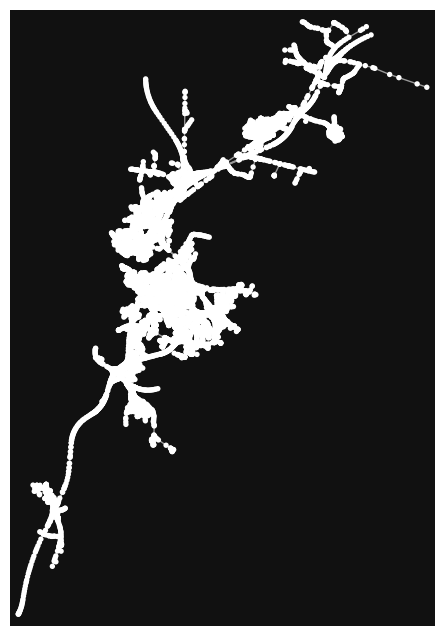

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
graph_50.edges

In [ ]:
G = graph_50


# Initialize lists to store node features, edge indices, and edge attributes
node_features = []
edge_index = []
edge_attrs = []

# Define a time range and interval for time-series data (example: hourly data over a day)
time_series_length = 100  # Example: 24 hours of data
node_timeseries = []

# Convert the time-series data for each node into a fixed-size tensor
for node, data in G.nodes(data=True):
    if 'time_series_data' in data and data['time_series_data'] is not None:
        print(data['time_series_data'])
        break
        # Assuming time_series_data is a Pandas Series with datetime index
        series = data['time_series_data']
        
        # Resample or interpolate to ensure a consistent length (e.g., 24 hours or another fixed size)
        #series_resampled = series_resampled.reindex(pd.date_range(series.index.min(), series.index.max(), freq='1H')).interpolate()
        
        # Limit to a fixed number of time points (trim or pad with zeros if necessary)
        timeseries_values = series[:time_s]
        if len(timeseries_values) < time_series_length:
            timeseries_values = np.pad(timeseries_values, (0, time_series_length - len(timeseries_values)), 'constant')
        
        # Append the time-series data as node feature
        node_features.append(timeseries_values)
    else:
        # If no data, pad with zeros
        node_features.append(np.zeros(time_series_length))

# Convert node_features list to a tensor
node_features = torch.tensor(node_features, dtype=torch.float)

# Build the edge index and edge attributes (if any)
for u, v, data in G.edges(data=True):
    edge_index.append([u, v])
    edge_index.append([v, u])  # Undirected graph, so add both directions

# Convert edge index to tensor
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()  # Transpose for PyTorch Geometric format

# Create the PyTorch Geometric Data object
data = Data(x=node_features, edge_index=edge_index)

# Print the dataset to verify
print(data)

[(Timestamp('2023-01-01 00:00:00'), 0.0), (Timestamp('2023-01-01 00:15:00'), 1.0), (Timestamp('2023-01-01 00:30:00'), 1.0), (Timestamp('2023-01-01 00:45:00'), 1.0), (Timestamp('2023-01-01 01:00:00'), 1.0), (Timestamp('2023-01-01 01:15:00'), 1.0), (Timestamp('2023-01-01 01:30:00'), 2.0), (Timestamp('2023-01-01 01:45:00'), 2.0), (Timestamp('2023-01-01 02:00:00'), 1.0), (Timestamp('2023-01-01 02:15:00'), 1.0), (Timestamp('2023-01-01 02:30:00'), 1.0), (Timestamp('2023-01-01 02:45:00'), 2.0), (Timestamp('2023-01-01 03:00:00'), 1.0), (Timestamp('2023-01-01 03:15:00'), 1.0), (Timestamp('2023-01-01 03:30:00'), 1.0), (Timestamp('2023-01-01 03:45:00'), 1.0), (Timestamp('2023-01-01 04:00:00'), 1.0), (Timestamp('2023-01-01 04:15:00'), 0.0), (Timestamp('2023-01-01 04:30:00'), 1.0), (Timestamp('2023-01-01 04:45:00'), 0.0), (Timestamp('2023-01-01 05:00:00'), 0.0), (Timestamp('2023-01-01 05:15:00'), 0.0), (Timestamp('2023-01-01 05:30:00'), 0.0), (Timestamp('2023-01-01 05:45:00'), 0.0), (Timestamp('202

In [27]:
node_features

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 